In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
import json


In [28]:
data = pd.read_csv('data/food-inspections.csv')

In [29]:
print(data.shape)
data.head(3)


(196030, 22)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2345787,"CARNICERIA LEON GUANAJUATO, INC.","CARNICERIA LEON GUANAJUATO, INC.",1821637.0,Grocery Store,Risk 1 (High),4301-4305 W ARMITAGE AVE,CHICAGO,IL,60639.0,...,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.916960,-87.733945,"{'latitude': '-87.7339453364064', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,2345790,AMSTAR FUEL & MINI MART,AMSTAR FUEL & MINI MART,1426374.0,Grocery Store,Risk 2 (Medium),3759 W CHICAGO AVE,CHICAGO,IL,60651.0,...,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.895304,-87.721129,"{'latitude': '-87.72112910359348', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2345766,ROJO GUSANO,ROJO GUSANO,1305286.0,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,CHICAGO,IL,60625.0,...,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.968390,-87.724448,"{'latitude': '-87.72444785924317', 'longitude'...",NaN,NaN,NaN,NaN,NaN


In [30]:
data.isnull().sum().sort_values(ascending=False)

Wards                         196030
Community Areas               196030
Zip Codes                     196030
Historical Wards 2003-2015    196030
Census Tracts                 196030
Violations                     52026
Facility Type                   4772
AKA Name                        2459
Latitude                         690
Longitude                        690
Location                         690
City                             138
Risk                              71
Zip                               50
State                             42
License #                         17
Inspection Type                    1
DBA Name                           0
Inspection Date                    0
Address                            0
Results                            0
Inspection ID                      0
dtype: int64

In [135]:
data=data.dropna(subset=['Facility Type','Latitude','Violations','Risk','Longitude','AKA Name'])
print(data.shape)

(142266, 25)


In [136]:
data.Risk.value_counts()

Risk 1 (High)      108033
Risk 2 (Medium)     26683
Risk 3 (Low)         7550
Name: Risk, dtype: int64

In [33]:
# data.drop( data[ data['Risk'] == 'All' ].index , inplace=True)
# print(data.shape)

(188284, 22)


In [138]:
data['year']=data['Inspection Date'].apply(lambda x:x.split('-')[0])
data['month']=data['Inspection Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])

/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,year,month,day
0,2345787,"CARNICERIA LEON GUANAJUATO, INC.","CARNICERIA LEON GUANAJUATO, INC.",1821637.0,Grocery Store,Risk 1 (High),4301-4305 W ARMITAGE AVE,CHICAGO,IL,60639.0,...,-87.733945,"{'latitude': '-87.7339453364064', 'longitude':...",NaN,NaN,NaN,NaN,NaN,2019,11,18
1,2345790,AMSTAR FUEL & MINI MART,AMSTAR FUEL & MINI MART,1426374.0,Grocery Store,Risk 2 (Medium),3759 W CHICAGO AVE,CHICAGO,IL,60651.0,...,-87.721129,"{'latitude': '-87.72112910359348', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,18
2,2345766,ROJO GUSANO,ROJO GUSANO,1305286.0,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,CHICAGO,IL,60625.0,...,-87.724448,"{'latitude': '-87.72444785924317', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,18
3,2345702,LAKESIDE FOOD WINE SPIRITS LLC,LAKESIDE FOOD WINE SPIRITS LLC,2694148.0,Grocery Store,Risk 3 (Low),2601 N HALSTED ST,CHICAGO,IL,60614.0,...,-87.648746,"{'latitude': '-87.64874626496409', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,15
4,2345678,"NEW KNOWLEDGE LEARNING CENTER, INC.","NEW KNOWLEDGE LEARNING CENTER, INC.",2215898.0,Children's Services Facility,Risk 1 (High),8440 S KEDZIE AVE,CHICAGO,IL,60652.0,...,-87.702257,"{'latitude': '-87.70225675980141', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,15


In [139]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,year,month,day
0,2345787,"CARNICERIA LEON GUANAJUATO, INC.","CARNICERIA LEON GUANAJUATO, INC.",1821637.0,Grocery Store,Risk 1 (High),4301-4305 W ARMITAGE AVE,CHICAGO,IL,60639.0,...,-87.733945,"{'latitude': '-87.7339453364064', 'longitude':...",NaN,NaN,NaN,NaN,NaN,2019,11,18
1,2345790,AMSTAR FUEL & MINI MART,AMSTAR FUEL & MINI MART,1426374.0,Grocery Store,Risk 2 (Medium),3759 W CHICAGO AVE,CHICAGO,IL,60651.0,...,-87.721129,"{'latitude': '-87.72112910359348', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,18
2,2345766,ROJO GUSANO,ROJO GUSANO,1305286.0,Restaurant,Risk 1 (High),3830 W LAWRENCE AVE,CHICAGO,IL,60625.0,...,-87.724448,"{'latitude': '-87.72444785924317', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,18
3,2345702,LAKESIDE FOOD WINE SPIRITS LLC,LAKESIDE FOOD WINE SPIRITS LLC,2694148.0,Grocery Store,Risk 3 (Low),2601 N HALSTED ST,CHICAGO,IL,60614.0,...,-87.648746,"{'latitude': '-87.64874626496409', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,15
4,2345678,"NEW KNOWLEDGE LEARNING CENTER, INC.","NEW KNOWLEDGE LEARNING CENTER, INC.",2215898.0,Children's Services Facility,Risk 1 (High),8440 S KEDZIE AVE,CHICAGO,IL,60652.0,...,-87.702257,"{'latitude': '-87.70225675980141', 'longitude'...",NaN,NaN,NaN,NaN,NaN,2019,11,15


### Inspection visualization

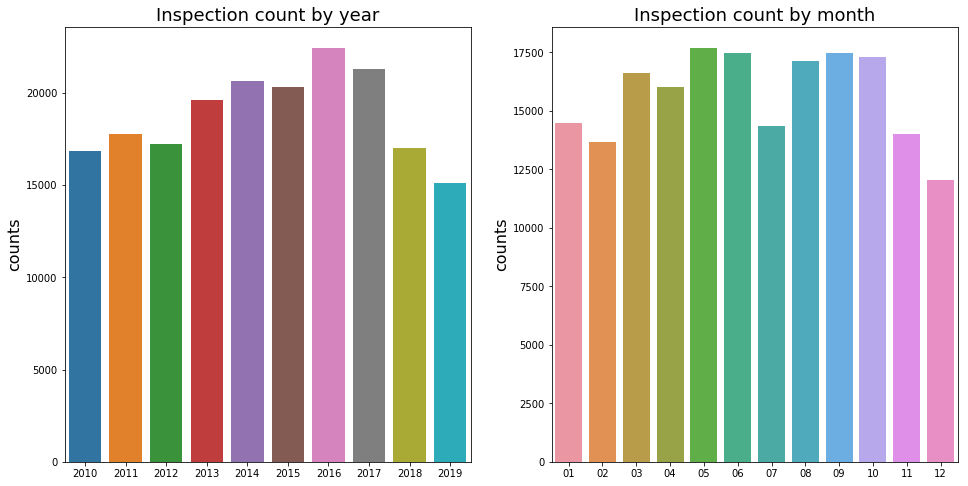

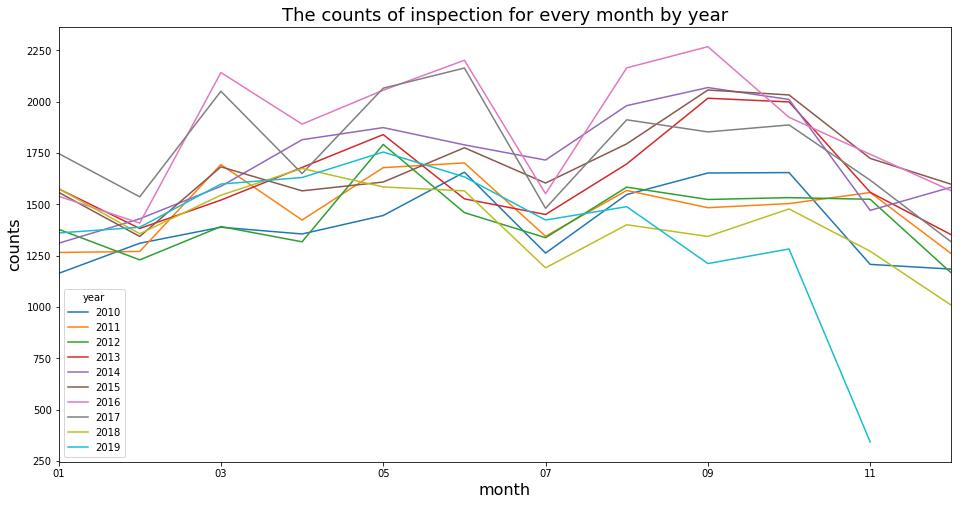

In [134]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
sns.barplot(x=data.year.value_counts().index,y=data.year.value_counts(), ax = ax[0])
ax[0].set_title("Inspection count by year",size=18)
ax[0].set_ylabel('counts',size=16)
ax[0].set_xlabel('')

sns.barplot(x=data.month.value_counts().index,y=data.month.value_counts(), ax = ax[1])
ax[1].set_title("Inspection count by month",size=18)
ax[1].set_ylabel('counts',size=16)
ax[1].set_xlabel('')
plt.show()

ax = data.groupby(['year','month'])['Inspection ID'].agg('count').unstack('year').plot(figsize=(16,8))
ax.set_title("The counts of inspection for every month by year",size=18)
ax.set_ylabel('counts',size=16)
ax.set_xlabel('month',size=16)
plt.show()


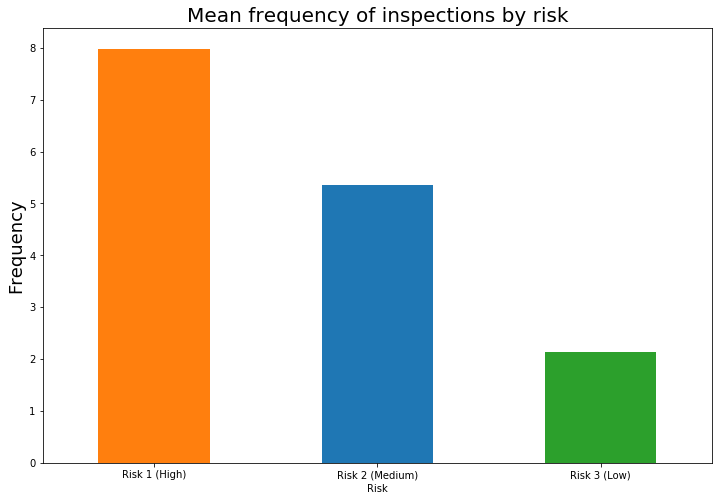

In [167]:
colors = ['C1','C0','C2']
plt.figure(figsize=(12,8))

ax = data.groupby(['Risk', 'DBA Name'])['Inspection ID'].agg('count').unstack('Risk').mean().plot(kind='bar', color = colors)
ax.set_title("Mean frequency of inspections by risk",size=20)
ax.tick_params(axis='x',labelrotation=360)
ax.set_ylabel('Frequency', size=18)
plt.show()

### Risk visualization

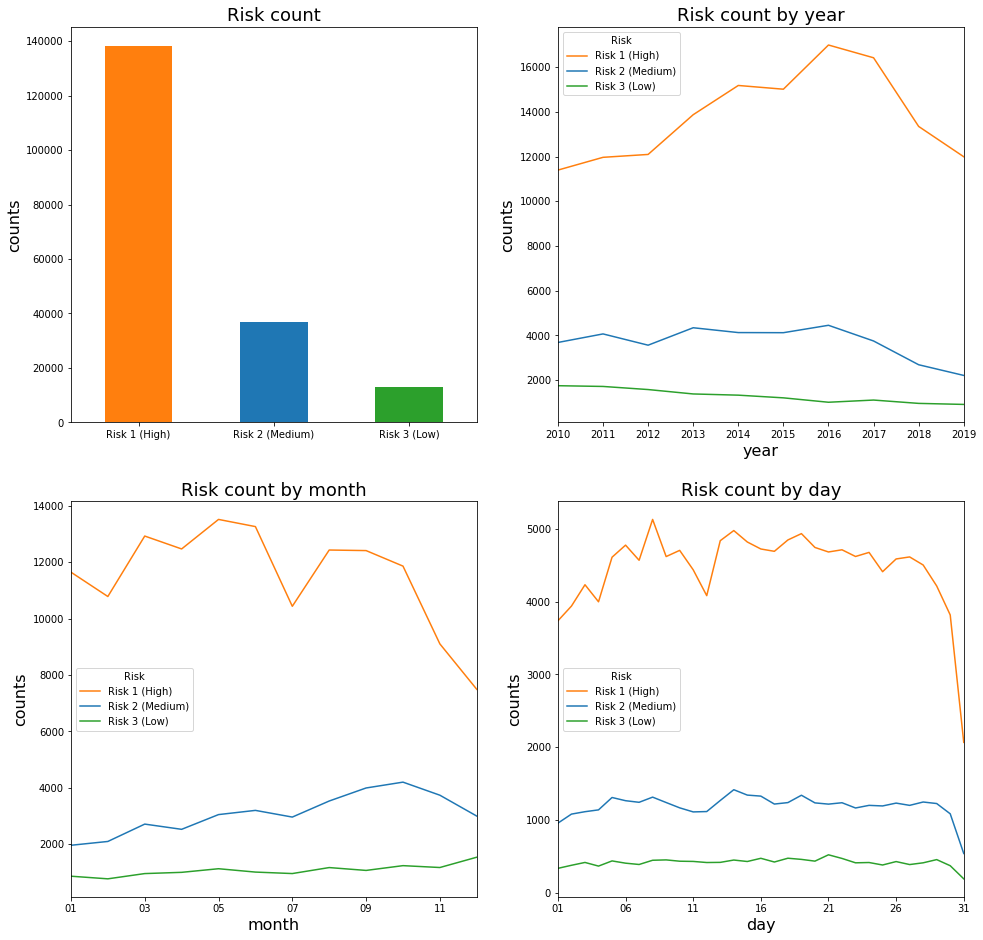

In [63]:

fig,ax=plt.subplots(2,2,figsize=(16,16))
data.Risk.value_counts().plot(kind = 'bar', color= colors, ax = ax[0,0]) 
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("Risk count",size=18)
ax[0,0].set_ylabel('counts',size=16)

data.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[0,1], color = colors)
ax[0,1].set_title("Risk count by year",size=18)
ax[0,1].set_ylabel('counts',size=16)
ax[0,1].set_xlabel('year',size=16)


data.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[1,0], color = colors)
ax[1,0].set_title("Risk count by month",size=18)
ax[1,0].set_ylabel('counts',size=16)
ax[1,0].set_xlabel('month',size=16)

data.groupby(['day','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[1,1], color = colors)
ax[1,1].set_title("Risk count by day",size=18)
ax[1,1].set_ylabel('counts',size=16)
ax[1,1].set_xlabel('day',size=16)

plt.show()

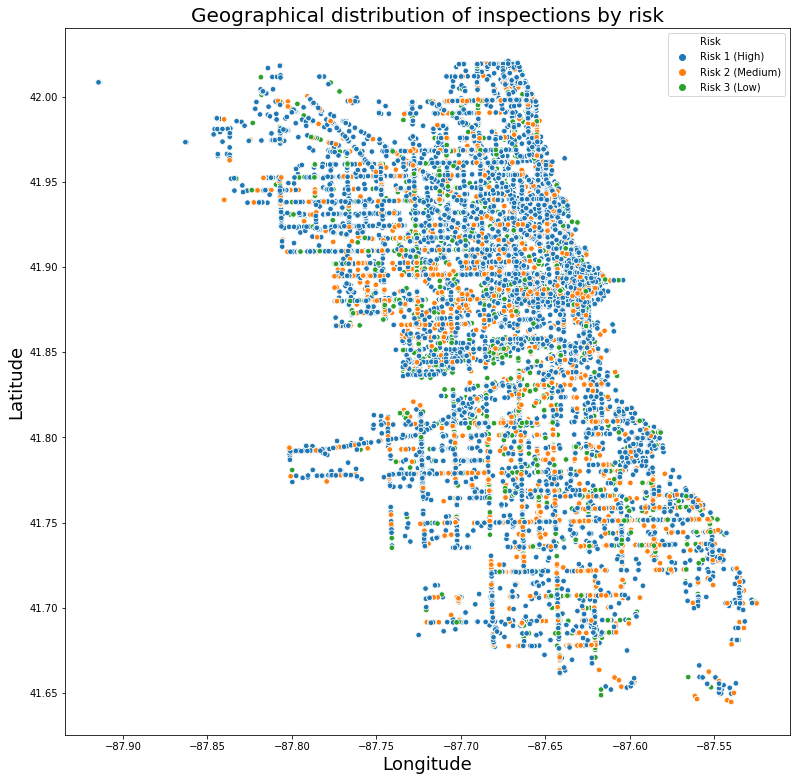

In [84]:
plt.figure(figsize=(13,13))
ax = sns.scatterplot(x='Longitude',y='Latitude',hue='Risk', color = colors ,data=data, s= 30)
ax.set_title("Geographical distribution of inspections by risk",size=20)
ax.set_xlabel('Longitude',size=18)
ax.set_ylabel('Latitude', size=18)
plt.show()

# Risk 1 Data (High risk)

In [109]:
data_1 = data[data['Risk'] == 'Risk 1 (High)' ]


In [100]:
data_subset= data[["Latitude","Longitude","AKA Name","Zip","Address","Risk"]]
missing = data_subset[data_subset.isnull().any(axis = 1)]
data_subset = data_subset.drop(missing.index)
data_subset = data_subset.reset_index()
# data_subset = data_subset.drop('index')

# data_subset.set_index('index')
data_subset.drop('index', axis = 1)
data_subset['Risk'] = data_subset['Risk'].apply(lambda x: 1 if '1' in x else 2 if '2' in x else 3 if '3' in x else 0)
data_subset['Risk'].value_counts()
data_subset = data_subset[data_subset['Risk'] !=0]
data_subset.shape

(192802, 7)

In [101]:
data_subset.groupby('Address').mean()

,index,Latitude,Longitude,Zip,Risk
Address,,,,,
1 E 113TH ST,127491.583333,41.688848,-87.622894,60628.0,1.000000
1 E 83RD ST,100744.318182,41.743547,-87.624252,60619.0,1.000000
1 E DELAWARE PL,107808.000000,41.899031,-87.628192,60611.0,2.105263
1 E ERIE ST,94240.000000,41.893964,-87.628063,60611.0,2.000000
1 E JACKSON BLVD,111649.967742,41.878110,-87.627535,60604.0,1.354839
1 E PEARSON ST,26866.666667,41.897411,-87.628152,60611.0,1.000000
1 E WACKER DR,85582.629630,41.886708,-87.627883,60601.0,1.000000
1 N DEARBORN ST,58241.333333,41.882030,-87.629256,60602.0,1.416667
1 N FRANKLIN ST,100547.695652,41.881967,-87.635165,60606.0,1.608696


In [51]:
coords = [[data_subset["Latitude"][k],data_subset["Longitude"][k]] for k in range(100)]
m= folium.Map(location= coord,tiles='Stamen Toner', zoom_start=10)
for point in range(0, len(coords)):
    folium.CircleMarker(coords[point], popup=data_subset['AKA Name'][point],radius=5,fill_color="#3db7e4").add_to(m)

bla = data_subset[['Latitude', 'Longitude']][0:100].as_matrix()
m.add_children(plugins.HeatMap(bla, radius=15))

m



/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


In [53]:
with open('chicago_zctas.geojson','r') as jsonFile:
    new_data = json.load(jsonFile)
tmp = new_data

#Create new JSON object
new_json = dict.fromkeys(['types','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = "features"

# Save new JSON object
open("updated-file.json","w").write(json.dumps(new_json,sort_keys = True, indent = 4,separators=(",",":")))

79

In [64]:
def create_map(table,zips,add_text=""):
    chicago_geo = r'updated-file.json'
    # initiating a Folium map with longitude and latitude
    m = folium.Map(location = coord,tiles='Stamen Toner', zoom_start = 11)
    # creating a choropleth map
    m.choropleth(
        geo_data = chicago_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.name',
        # first element contains location information, second element contains feature of interest
        columns = [zips],
        fill_color = 'RdYlGn',
        #legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across LA'
    )
    folium.LayerControl().add_to(m)
    # save map with filename based on the feature of interest
    m.save(outfile = mapped_feature + '_map.html')